/Users/ivashkaleha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


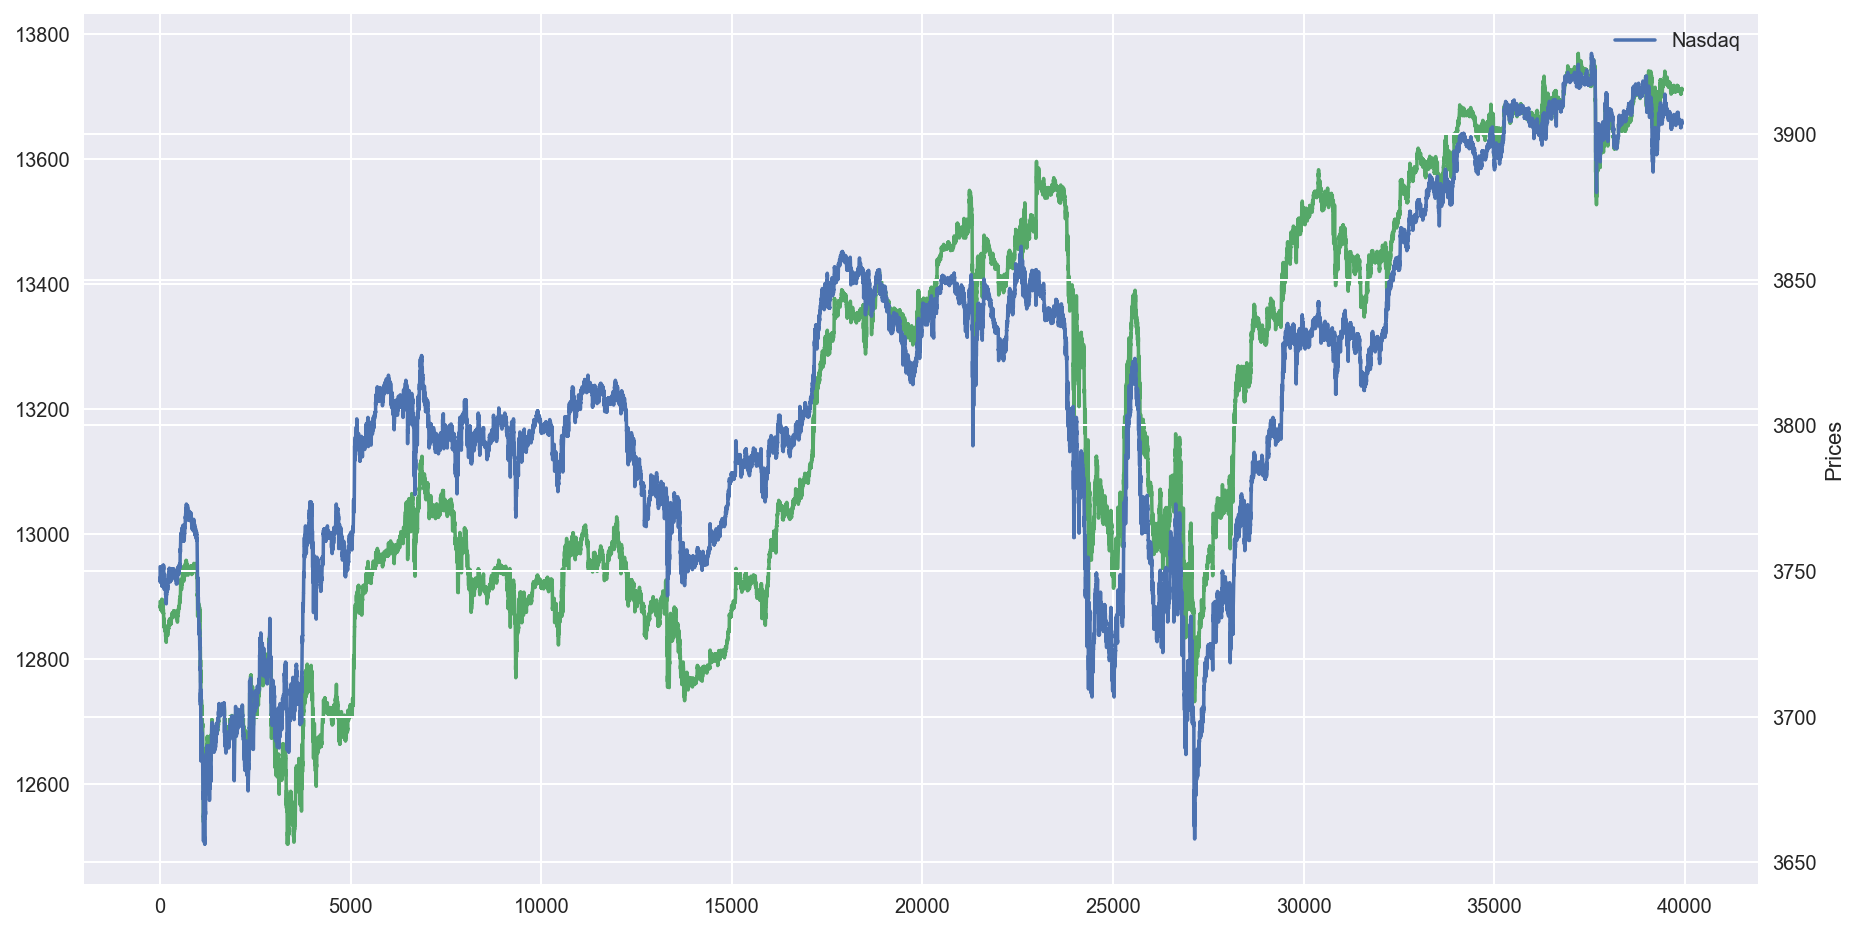

In [163]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import datetime




#def data_preproceccing(list: files_list):
#    """Parse files list and return dataframe on close prices."""
#    for file in files_list:
#        file = pd.read_csv(file, names=['Date', 'Open', 'High', 'Low', 'Close_ES', 'Volume'], sep=';')


date = pd.Series()



es = pd.read_csv('ES03-21.Last.txt', names=['Date', 'Open', 'High', 'Low', 'Close_ES', 'Volume'], sep=';')
#es.Date = pd.to_datetime(es.Date, format='%Y%m%d %H%M%S')
#es.index = pd.to_datetime(es.Date)
es.drop(columns=['Date', 'Open', 'High', 'Low', 'Volume'], inplace=True)

nq = pd.read_csv('NQ03-21.Last.txt', names=['Date', 'Open', 'High', 'Low', 'Close_NQ', 'Volume'], sep=';')
#nq.index = pd.to_datetime(nq.Date)

date =  pd.to_datetime(nq.Date)
nq.drop(columns=['Date', 'Open', 'High', 'Low', 'Volume'], inplace=True)



data = pd.merge(es , nq, how='inner', left_index=True, right_index=True)


plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 300
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
data.Close_ES.plot(figsize=(15,8), secondary_y=True)
data.Close_NQ.plot()
plt.legend(['Nasdaq', 'S&P'])
plt.ylabel('Prices')
plt.xlabel('Date')

plt.show()

In [164]:
data

,Close_ES,Close_NQ
0,3751.50,12891.50
1,3748.25,12884.75
2,3746.25,12882.00
3,3747.50,12881.50
4,3747.25,12881.75
...,...,...
39922,3903.75,13708.75
39923,3903.50,13711.50
39924,3903.50,13713.00
39925,3904.25,13711.50


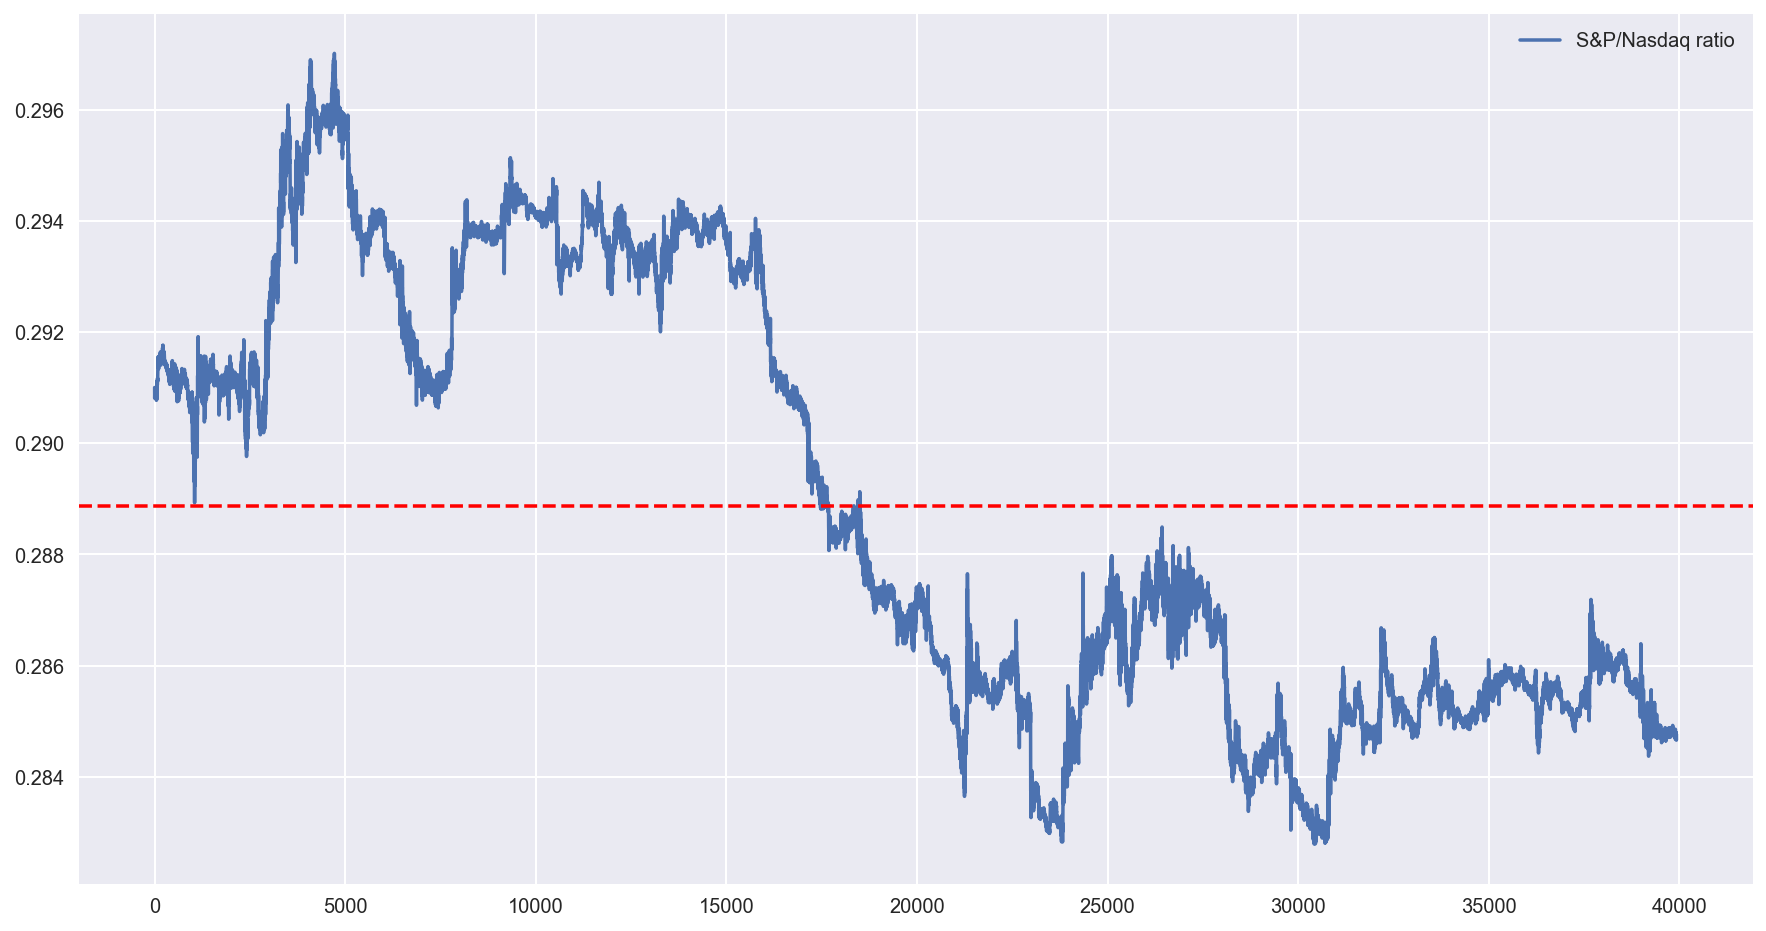

In [165]:
ratioESNQ.plot(figsize=(15,8))
plt.axhline(ratioESNQ.mean(), color='red', linestyle='--');
plt.legend(['S&P/Nasdaq ratio']);

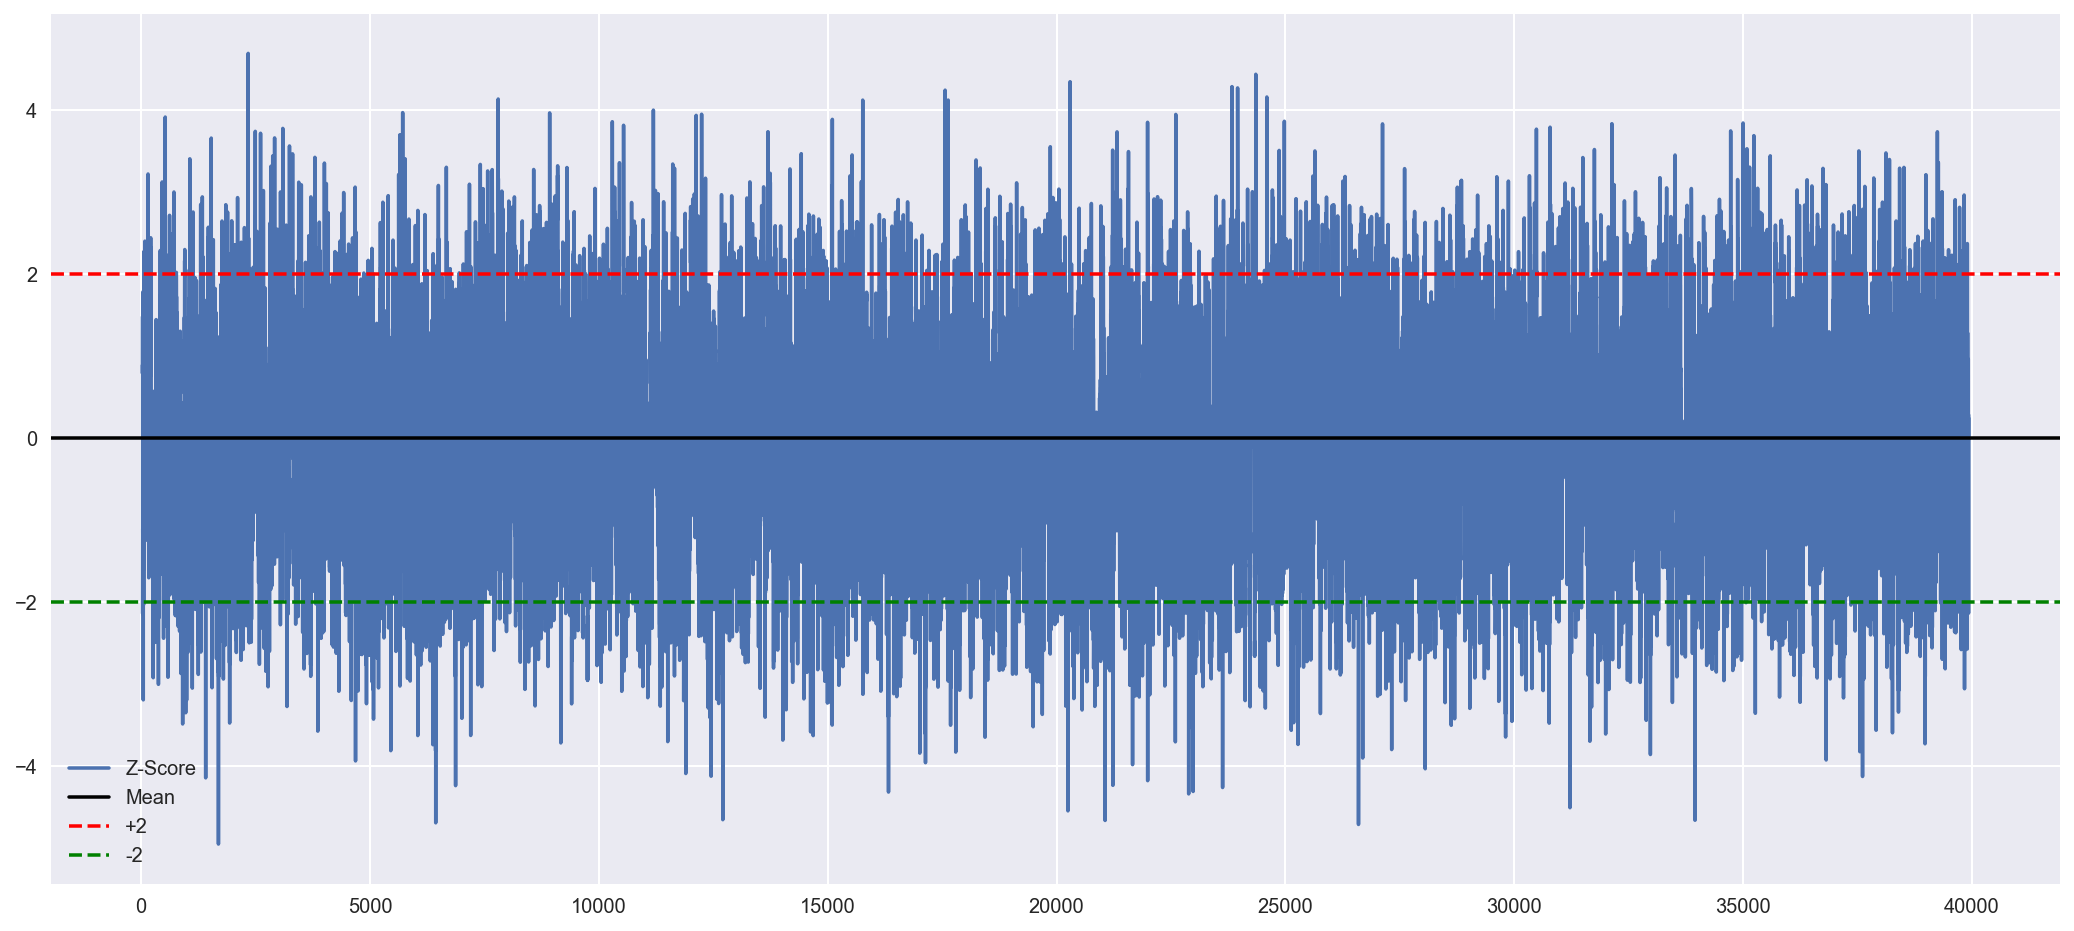

In [166]:
# Compute rolling mean of ratio
data['ratio'] = data.Close_ES / data.Close_NQ

data['mavg_30'] = data.ratio.rolling(window=30).mean()

# Compute rolling standard deviation of ratio
data['std_30'] = data.ratio.rolling(window=30).std()

# Calculate z-score
z_score = (data.ratio - data.mavg_30)/data.std_30

# Plot z-score
plt.figure(figsize=(18, 8))
z_score.plot()
plt.axhline(0, color='black')
plt.axhline(2.0, color='red', linestyle='--')
plt.axhline(-2.0, color='green', linestyle='--')
lg = ['Z-Score', 'Mean', '+2', '-2']
plt.legend(lg)
plt.show()

In [167]:
z_score.dropna(inplace=True)
time_to_buy = z_score[z_score > 2].index
time_to_sell = z_score[z_score < -2].index
reverting = z_score[(z_score < 0.5) & (z_score > -0.5)].index

In [168]:
# Calculate PNL Buying NQ and Shorting ES

NUMBER_OF_TRADES = 0

sell_es = {'Position' : 0, 'Price' : []}
buy_nq = {'Position' : 0, 'Price' : []}
pnl = []

for row in range(len(data)):
    if data.index[row] in time_to_buy:
        sell_es['Position'] += 1
        NUMBER_OF_TRADES += 2 
        sell_es['Price'].append(data.iloc[row][0])
        buy_nq['Position'] += 1
        buy_nq['Price'].append(data.iloc[row][1])
    if data.index[row] in reverting:
        #print(sell_es['Price'])
        if sell_es['Price']:
            #print(sell_es['Price']
            
            pnl_es = (np.mean(sell_es['Price'])-data.iloc[row][0])*50*sell_es['Position']
            #print(pnl, np.mean(sell_es['Price']), data.iloc[row][0])
            pnl_nq = (data.iloc[row][1]-np.mean(buy_nq['Price']))*20*buy_nq['Position']
            
            NUMBER_OF_TRADES += buy_nq['Position']
            NUMBER_OF_TRADES += sell_es['Position']
            
            pnl.append(pnl_nq+pnl_es)
            sell_es['Price'] = []
            sell_es['Position'] = 0
            buy_nq['Price'] = []
            buy_nq['Position'] = 0 
            
#x = np.linspace(0,len(pnl), len(pnl))
#y = sorted(pnl)
#plt.plot(x, y)



In [169]:
#plt.hist(y, color = 'blue', edgecolor = 'black', bins=10);

In [170]:
pnl_short_es_buy_nq = pnl
sum(pnl_short_es_buy_nq)

218412.49999999997

In [171]:
sorted(pnl_short_es_buy_nq)

[-4647.4999999997635,
 -4537.500000000251,
 -4357.5,
 -1802.5,
 -1567.4999999999045,
 -1532.4999999998545,
 -1434.99999999995,
 -1357.500000000141,
 -1340.0000000001046,
 -834.9999999998818,
 -569.9999999999727,
 -492.4999999999545,
 -377.49999999991815,
 -225.0,
 -182.50000000005002,
 -85.00000000015461,
 -72.5,
 -62.500000000045475,
 -60.0,
 -59.99999999998636,
 -45.0,
 -37.50000000002274,
 -15.0,
 -7.5,
 -2.5,
 5.0,
 15.0,
 15.0,
 15.000000000131877,
 20.0,
 22.5,
 25.0,
 27.5,
 32.5,
 37.5,
 40.0,
 42.5,
 42.5,
 45.0,
 47.5,
 47.5,
 47.5,
 47.5,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 52.5,
 52.5,
 52.5,
 52.5,
 52.5,
 52.5,
 52.5,
 55.0,
 55.0,
 55.0,
 55.0,
 55.0,
 55.0,
 57.49999999994088,
 57.5,
 57.5,
 57.5,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 62.5,
 62.5,
 62.5,
 62.5,
 62.5,
 62.5,
 62.5,
 62.5,
 62.5,
 65.0,
 65.0,
 65.0,
 65.0,
 65.0,
 65.0,
 65.0,
 65.0,
 65.0,
 65.0,
 67.5,
 67.5,
 67.5,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 72.

In [172]:
# Calculate PNL Buying ES and Shorting NQ

buy_es = {'Position' : 0, 'Price' : []}
sell_nq = {'Position' : 0, 'Price' : []}
pnl = []

for row in range(len(data)):
    if data.index[row] in time_to_sell:
        
        NUMBER_OF_TRADES += 2 
        buy_es['Position'] += 1
        buy_es['Price'].append(data.iloc[row][0])
        sell_nq['Position'] += 1
        sell_nq['Price'].append(data.iloc[row][1])
        
    if data.index[row] in reverting:
        #print(sell_es['Price'])
        if buy_es['Price']:
            #print(buy_es['Price'], buy_es['Position'])
            
            pnl_es = (data.iloc[row][0] - np.mean(buy_es['Price']))*50*buy_es['Position']
            #print(pnl, np.mean(sell_es['Price']), data.iloc[row][0])
            pnl_nq = (np.mean(sell_nq['Price']) - data.iloc[row][1])*20*sell_nq['Position']
            pnl.append(pnl_nq+pnl_es)
            
            NUMBER_OF_TRADES += buy_es['Position']
            NUMBER_OF_TRADES += sell_nq['Position']
            
            buy_es['Price'] = []
            buy_es['Position'] = 0
            sell_nq['Price'] = []
            sell_nq['Position'] = 0 
            
#x = np.linspace(0,len(pnl), len(pnl))
#y = sorted(pnl)


#plt.plot(x, y)

In [173]:
pnl_short_nq_buy_es = pnl

sum(pnl_short_nq_buy_es)

199687.50000000047

In [174]:
sorted(pnl_short_nq_buy_es)

[-3945.0000000000546,
 -3439.99999999995,
 -1725.000000000182,
 -1565.0,
 -1357.5,
 -1285.0,
 -915.0000000000682,
 -804.999999999909,
 -680.0,
 -595.0000000001,
 -589.9999999999272,
 -567.4999999998818,
 -559.9999999999545,
 -505.0,
 -450.0000000001046,
 -415.0,
 -410.00000000002274,
 -407.5000000000455,
 -384.99999999993634,
 -354.99999999988177,
 -319.9999999999545,
 -287.4999999999545,
 -252.49999999995453,
 -250.00000000000455,
 -242.5000000000682,
 -212.5,
 -142.49999999999545,
 -87.49999999995453,
 -82.50000000002728,
 -57.50000000005002,
 -57.5,
 -47.5,
 -45.0,
 -42.5,
 -37.50000000001364,
 -30.00000000001819,
 -30.0,
 -15.0,
 -7.5,
 -7.5,
 2.5,
 10.0,
 20.0,
 20.0,
 20.0,
 20.0,
 22.5,
 22.5,
 25.0,
 25.0,
 25.0,
 27.499999999949978,
 27.5,
 27.5,
 30.0,
 30.0,
 30.0,
 32.5,
 32.5,
 32.5,
 32.5,
 32.5,
 32.5,
 35.0,
 35.0,
 35.0,
 35.0,
 35.0,
 37.5,
 37.5,
 37.5,
 37.5,
 37.5,
 37.5,
 37.5,
 37.5,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 42.5,
 42.5,
 42

In [175]:
total_pnl = sum(pnl_short_es_buy_nq) + sum(pnl_short_nq_buy_es)
total_pnl

418100.00000000047

In [176]:
NUMBER_OF_TRADES

13832

In [177]:
commisions = NUMBER_OF_TRADES * 5 
commisions

69160

In [178]:
total_pnl-commisions

348940.00000000047

In [186]:
#Trading Days

len(data)/(60*24)

27.727083333333333